# MNIST Classification

#### In this notebook we will try to train a classification model to identify numbers within the MNIST dataset succesfully. We will go through explroing the dataset, finding the right hyperparamters, expanding the dataset with some data augmentation, creating the model, and analyzing its preformance.

### Table Of Context
#### 1. Data Exploration 
#### 2. Hyperparamter Tuning
#### 3. Model Selection
#### 4. Performance Analyzing 

#### Imports

In [42]:
#Imports 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import joblib
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier 

#### Data Exploration

In [7]:
mnist = fetch_openml('mnist_784')
mnist

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [8]:
mnist["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
mnist["target"].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

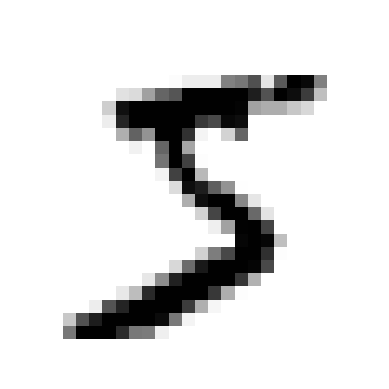

This Number is a 5


In [10]:
#X represents the pixels while y represents that number the image is showing
X, y = mnist["data"], mnist["target"]

some_digit = X.loc(0)[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()
print("This Number is a", y[0])

In [11]:
#Changing the target attributes to integers from strings
print(type(y[0]))
y = y.astype(np.uint8) # uint8 = 8 bit unsigned integer 
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


#### Hyperparamter Tuning

In [12]:
# Lets create the test set and training set before we move on. The MNIST dataset is already split up into testing and training sets.
# The first 60000 are for training and the rest are for testing

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Model Selection

In [13]:
# Creating a base model

knn_clf = KNeighborsClassifier()
param_grid = {
    "n_neighbors" : [5, 10, 20, 50, 100]
}

gs = GridSearchCV(
    estimator= knn_clf, 
    param_grid=param_grid,
    scoring="accuracy",
    refit="accuracy",
    cv=3, 
    verbose=1
)



In [14]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20, 50, 100]}, refit='accuracy',
             scoring='accuracy', verbose=1)

In [15]:
print("best paramters are:", gs.best_params_)
print("best score:", gs.best_score_)

best paramters are: {'n_neighbors': 5}
best score: 0.9674166666666667


In [16]:
# Lets try other other classification algorithms to see if the accuracy compares to KNN
forest_clf = RandomForestClassifier()
svc = SVC()
sgd_clf = SGDClassifier(random_state=42)

forrest_score = cross_val_score(forest_clf, X_train, y_train, cv=3)
svc_score = cross_val_score(svc, X_train, y_train, cv=3)
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=3)

In [17]:
print("Random Forest Classifier Scores:", forrest_score)
print("Support Vector Machine Scores:", svc_score)
print("SGD Classifier Scores:", sgd_score)

Random Forest Classifier Scores: [0.9645 0.9616 0.9656]
Support Vector Machine Scores: [0.977  0.9738 0.9739]
SGD Classifier Scores: [0.87365 0.85835 0.8689 ]


From the models above we can see tha the support vector machine works the best on the model with a 97% accuracy. Now lets do some error analysis to really test how well the support vector algorithm works.

#### Preformance Analysis

Analyze and explain precision, recall, and f1 score

In [20]:
svc_predict = cross_val_predict(svc, X_train, y_train, cv=3)

In [31]:
precision = precision_score(svc_predict, y_train, average="macro")
recall = recall_score(svc_predict, y_train, average="macro")
f1 = f1_score(svc_predict, y_train, average="macro")
print("precision score:", precision, '\n')
print("recall score:", recall, '\n')
print("f1 Score:", f1, '\n')


precision score: 0.9747208166258133 

recall score: 0.9747099499157873 

f1 Score: 0.974703829501878 



In [22]:
conf_mx = confusion_matrix(y_train, svc_predict)
conf_mx

array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]])

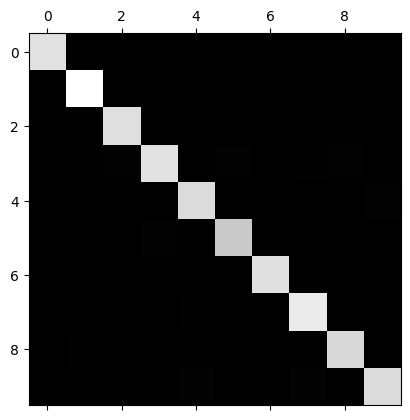

In [30]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Determined that model has high accuracy, recall, precision, and f1 score, we can now start to train the actual model.

#### Creating final Model

In [32]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [33]:
svc_predictions = svc_model.predict(X_test)

In [40]:
print("Accuracy Score:", accuracy_score(svc_predictions, y_test))
print("F1 Score:", f1_score(svc_predictions, y_test, average="macro"))

Accuracy Score: 0.9792
F1 Score: 0.9791298259748042


In [41]:
filename = "MNIST_classification_SVC.sav"
joblib.dump(svc_predictions, filename=filename)

['MNIST_classification_SVC.sav']